# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.

- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
    - Typo for Delicassen; no nulls, all int values and with the exception of some outliers which are not 'obvious errors' the data looks ok

- Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.

- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.

- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.

- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.

- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.

- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [2]:
# imports - Pandas, data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#import wholesale_data - it's in the same directory

data = pd.read_csv('wholesale_data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Step 1: Basic data exploration e.g. shape, nulls, data types

In [4]:
data.shape
# 440 rows of 8 columns / features

(440, 8)

In [5]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
data.info()
# all integers and all non null, perhaps some outliers or 0 values?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Initial impressions:
- Numerically, Channel and Region are completely distinct from Fresh, Milk etc the other later columns. If this is sales / wholesale data then this makes sense as channel and Region are probably encoded values that represent the names of different regions e.g. North, South, West... and Channels e.g. Online, in-store, retail partner etc.
- To evidence this, we can look at number of unique values for each column, it's very likely there's only around a maximum of 5-10 channels (online/instore/retail/events...????) or 10-20 regions (north/south/east/west/central/mountain/coast...????) but the number of sales of product categories would be much much higher than this
- Delicassen should be **Delicatessen** but it doesn't matter really

In [15]:
print(data['Channel'].value_counts()) # only two channels

print(data['Region'].value_counts()) # only three regions

print(data['Fresh'].value_counts()) # 433 different unique values for Fresh category

print(data['Grocery'].value_counts()) # 430 different unique values for Grocery category

Channel
1    298
2    142
Name: count, dtype: int64
Region
3    316
1     77
2     47
Name: count, dtype: int64
Fresh
9670     2
3        2
18044    2
8040     2
514      2
        ..
18827    1
10405    1
37036    1
30379    1
2787     1
Name: count, Length: 433, dtype: int64
Grocery
1664    2
2062    2
683     2
3600    2
6536    2
       ..
7305    1
3343    1
5034    1
8282    1
2510    1
Name: count, Length: 430, dtype: int64


In [25]:
# change the Delicassen column to Deli
data.rename(columns={'Delicassen': 'Deli'}, inplace=True)

Next Steps:
- I'm fully convinced Region and Channel are label encoded variables whereas the other categories are the actual sales data
- for K Means Clustering I would therefore lean toward three (for region) or two (channel) means for modelling as a first run, before anything else is learned
- Box plots to find outliers
- Correlation Matrix to find any correlations

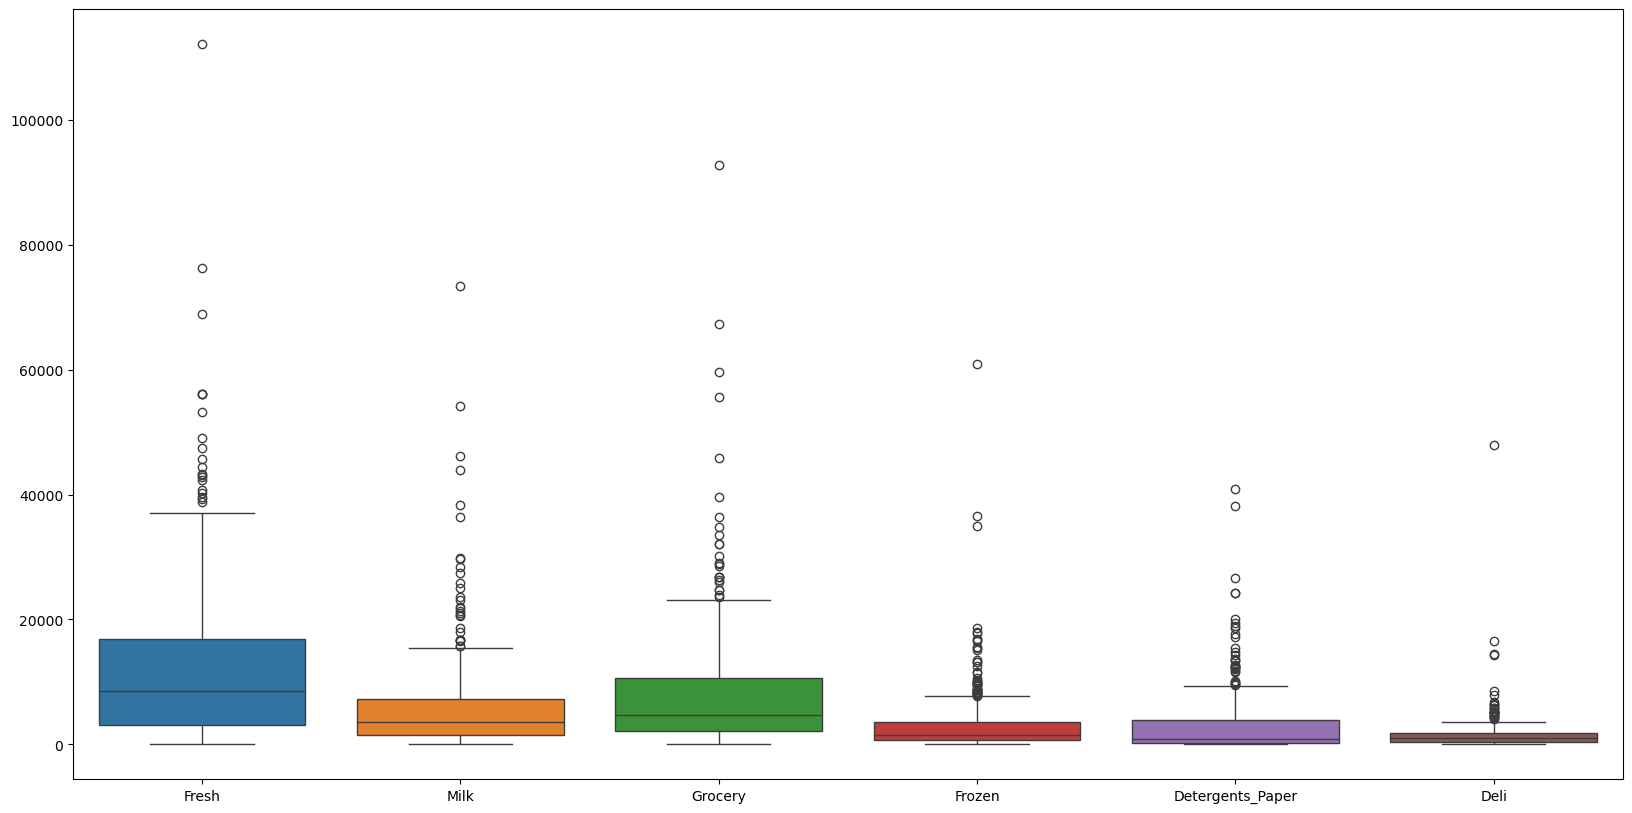

Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Deli                 1524.870455
dtype: float64 
 Channel                1.0
Region                 3.0
Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Deli                 965.5
dtype: float64


In [26]:
# box blots of each of the columns to see if there are any outliers, excluding Channel and Region
plt.figure(figsize=(20,10))
sns.boxplot(data=data.drop(['Channel', 'Region'], axis=1))
plt.show()

# print the mean and median of the six categories
print(data.mean(), '\n', data.median())


All of the food categories are skewed up by outliers.
Heatmap to follow:

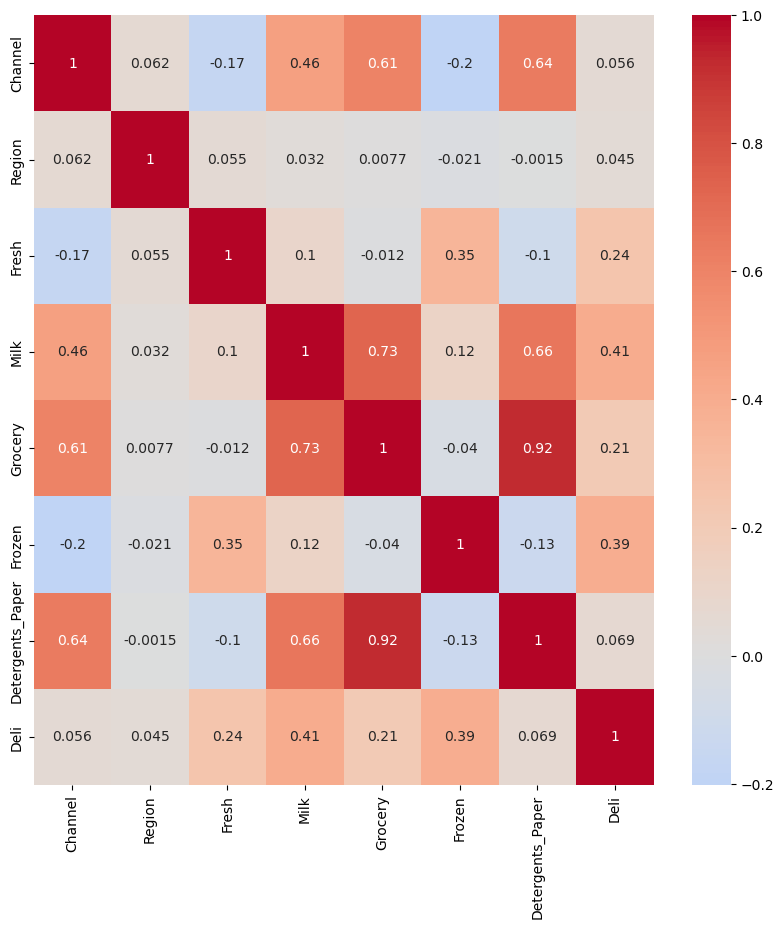

In [27]:
# sns heatplot of the correlation matrix, scale from -1 to 1
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.show()



Thoughts on heatmap:
- Region doesn't correlate seriously with almost anything; 
- Channel correlates with milk, grocery and detergents_paper. Does this imply that these categories are typically bought in the same channel? If so, which channel and why aren't fresh/frozen bought via this channel? If fresh & frozen are bought instore not online, then who is buying milk in the online channel?
- Milk sales correlates with detergents_paper and grocery sales because they also correlate in the same channel (Channel 2). 
- Frozen and fresh correlate with one another and also because they correlate in the same channel (Channel 1)


I am interpreting this as channel 2 is more popular for milk, detergents_paper and grocery sales whilst Channel 1 is more popular for fresh and frozen and deli to some extent.

<Figure size 3000x3000 with 0 Axes>

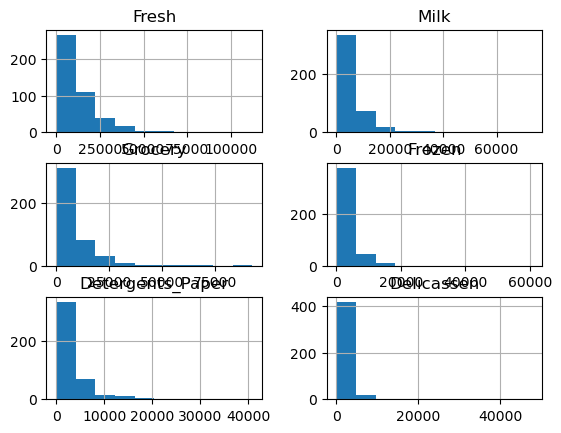

In [10]:
# histogram of the six categories above
plt.figure(figsize=(30,30))
data.drop(['Channel', 'Region'], axis=1).hist()
plt.show()


### Thoughts ###
- Generally higher sales in Fresh - higher average, higher maximum.
- other categories are quite narrow. ranges
- There are quite a few outliers in most categories
- Because this is an unsupervised problem I do not want to delete them. From the volume of them alone and the fact there are many in each category, it may be useful in finding patterns

### Because Fresh is the most varying feature, let's explore channel / region vs Fresh correlation ###

In [16]:
# value counts of channel vs fresh
print(data['Channel'].value_counts())

Channel
1    298
2    142
Name: count, dtype: int64


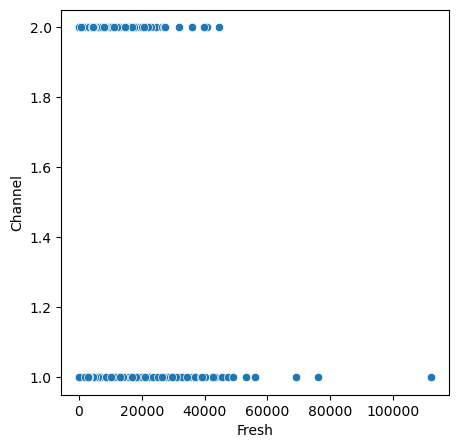

In [12]:
# scatter plot Fresh vs Channel
plt.figure(figsize=(5,5))
sns.scatterplot(data=data, x='Fresh', y='Channel')
plt.show()


looks like there may be more sales for Fresh in Channel 1.0 but theres twice the number of data points too, so its not certain. Run a corr() score

In [17]:
# corr score on Fresh vs channel
data['Fresh'].corr(data['Channel'])


-0.16917203797978886

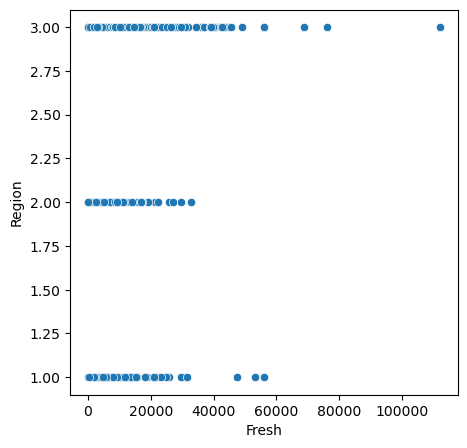

In [13]:
# scatter plot Fresh vs Region
plt.figure(figsize=(5,5))
sns.scatterplot(data=data, x='Fresh', y='Region')
plt.show()


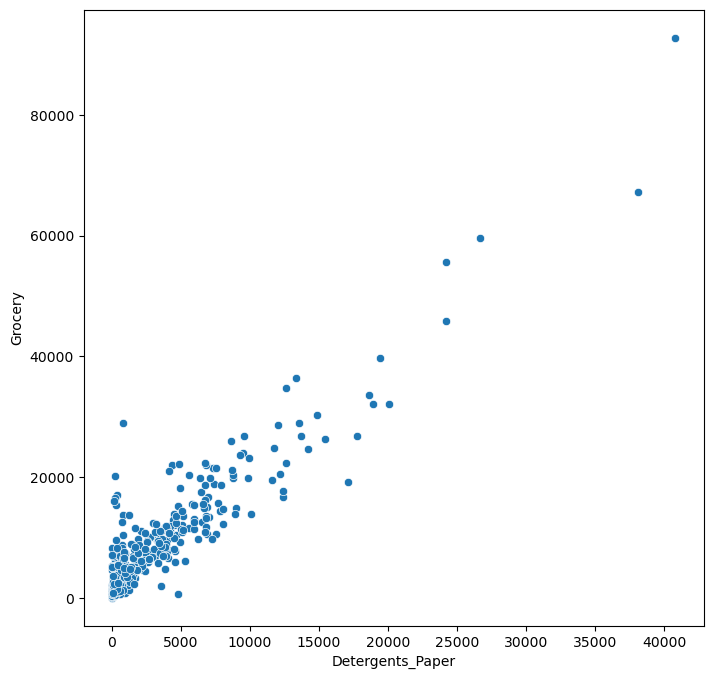

In [35]:
# scatterplot of Detergents_paper vs Grocery - which appear to correlate from the heatmap VERY STRONGLY
plt.figure(figsize=(8,8))
sns.scatterplot(x='Detergents_Paper', y='Grocery', data=data)
plt.show()

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

### First run: Drop the region column, channel column remains

In [44]:
# it is possible that there's a relationship between region and channel but the corr() score is 0.065 so it's very unlikely
# so I will run two separate models, one without channel and one without region. I will drop region first because the Channel feature has more correlation with the other features

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # scale the data first

# based on the number of channels, i would assume 2 clusters, for regions 3 clusters
# let's define a cluster range from 1 to 10 to make sure
cluster_range = range(1, 10)

# drop the region column to just model channel relationships
channel_data = data.drop('Region', axis=1)

# scale the data - standardization
scaler = StandardScaler()
channel_data_scaled = scaler.fit_transform(channel_data)

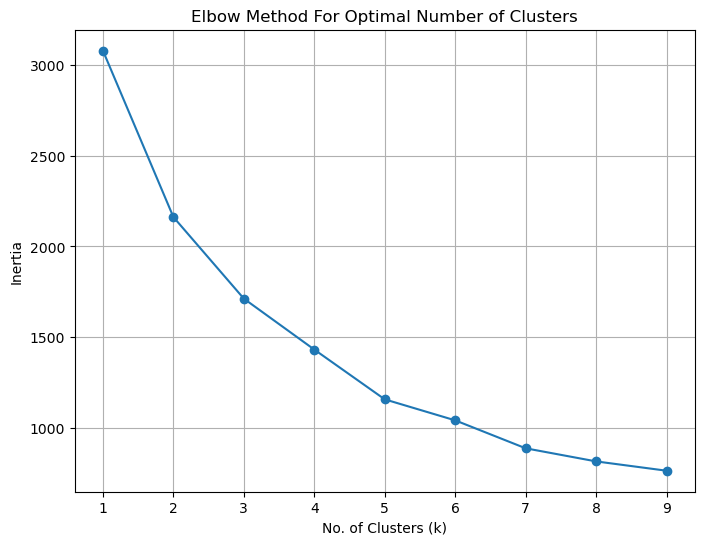

In [45]:
# Re-calculate inertia values for the defined cluster range
inertia = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(channel_data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph again with the corrected cluster range
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('No. of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

### Thoughts

The elbow rule is difficult to use here because you could make the case for any of 3, 4 or 5 because the line from 3 to 5 is almost straight.
I would lean towards 3 for less complexity to begin with unless some other evidence is compelling to identify 1 or 2 more distinct clusters 

### Second run: with region column, channel column now dropped

Try K Means again with the region not the channel

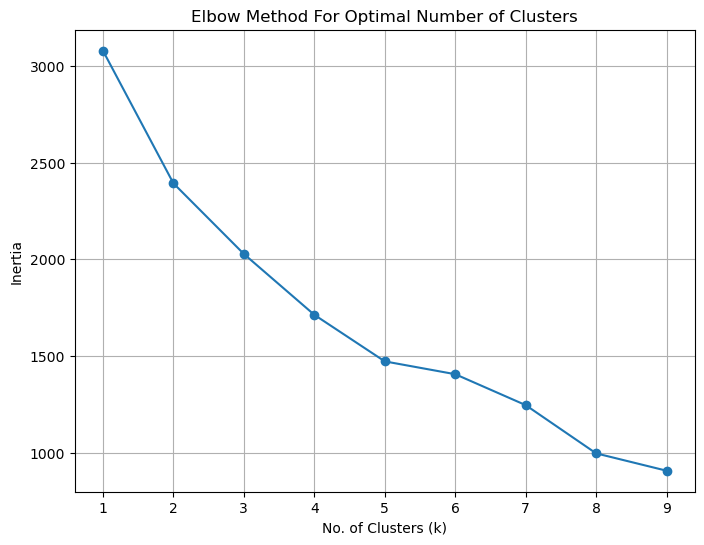

In [46]:
# now run again without the channel column, and have region instead
region_data = data.drop('Channel', axis=1)

# scale the data - standardization
scaler = StandardScaler()
region_data_scaled = scaler.fit_transform(region_data)

# Re-calculate inertia values for the defined cluster range
inertia = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(region_data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph again with the corrected cluster range
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('No. of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


### Thoughts

- The overall inertia is higher with this throughout, and the graph looks very different as the inertia almost bumps up from 5 - 6 clusters unlike with the 'Channel run'

### Run 3: Both region and channel kept intact

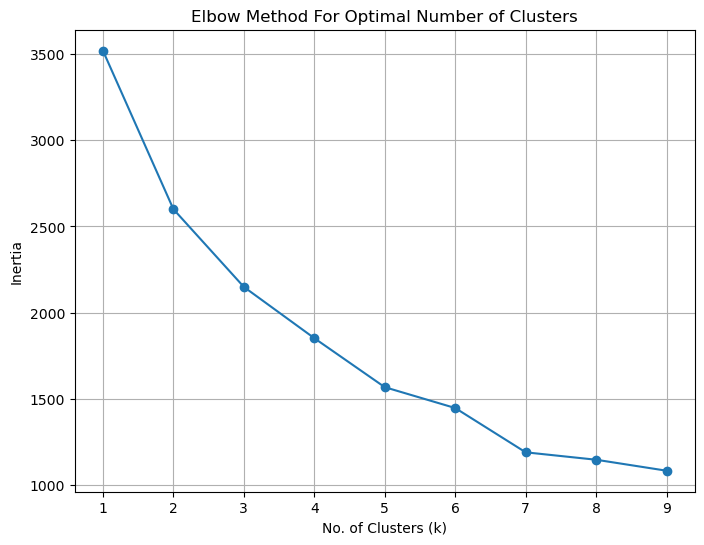

In [47]:
# k means again with original data

# first scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# run kmeans with cluster_range
inertia = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph again with the corrected cluster range
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('No. of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()



### Thoughts

- You can see a lot more inertia with both region and channel present and through all three of these runs, it appears that 3 - 5 clusters is optimal where the gradient is almost equal through the three points
- Should we identify **two clusters** as optimal because the most significant decrease in gradient is going from 2-3 after 1-2 clusters?

In [49]:
# knee locator to find the optimal number of clusters
from kneed import KneeLocator
kneedle = KneeLocator(cluster_range, inertia, curve='convex', direction='decreasing')
optimal_k = kneedle.elbow
print(f"Optimal Number of clusters is {optimal_k}")

Optimal Number of clusters is 3


### **KneeLocator identifies 3 clusters** as previously discussed, the graph straightens out from 3 - 5 and 3 is preferable to avoid overfitting, whilst still adequately reducing inertia. ###

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

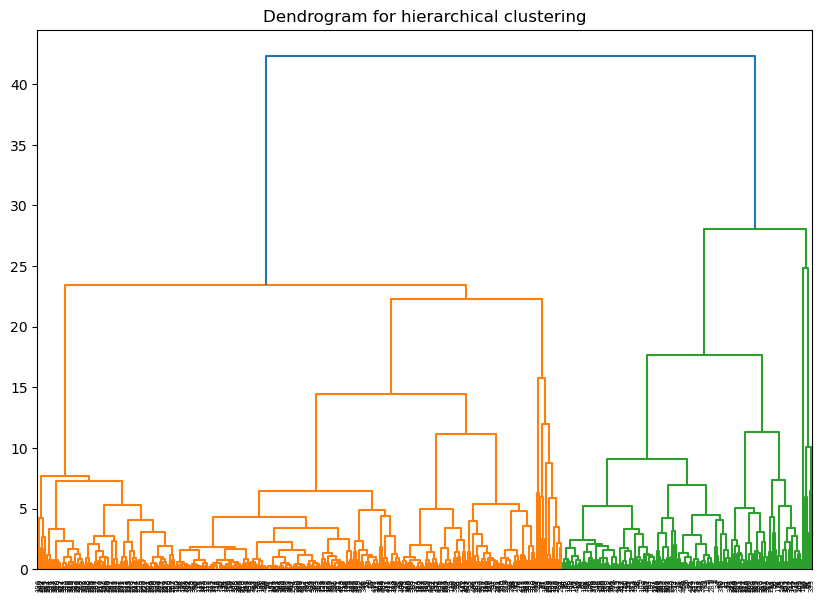

In [51]:
# Benefit of hierarchical clustering is that we don't need to specify the number of clusters

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

# create a dendrogram with the scaled data, ward method reduces variance between clusters
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for hierarchical clustering")
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))



### Thoughts
- You can see from the 'longest legs' here that there is an argument for two clusters which would match the two channels available and the differing correlations we discussed above
- The 'legs' are split very very close together for 3, 4 and 5 so I think 2 may be stronger but 3 is still a reasonable argument, again to balance against overfitting with enough differentiation

In [61]:
# agglomerative clustering - assume 3 clusters
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels_3 = agg_cluster.fit_predict(data_scaled)

# add the cluster labels to the original data
print(cluster_labels_3)

[2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 1 2 1 2 1 2 1 1 1 2 2 1 1 2 1 1 1 1 1 1 2 1
 2 2 1 1 1 2 2 2 2 2 0 2 2 1 1 2 2 1 1 2 2 1 1 2 0 2 2 1 2 1 2 1 1 1 1 1 2
 2 1 1 2 1 1 1 2 2 1 2 0 0 1 1 1 1 1 2 1 2 1 2 1 1 1 2 2 2 1 1 1 2 2 2 2 1
 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 2 2 1 2 2 2 1 1 2 2 2 2 1 1 1 2 2 1 2 1 2 1 1 1 1 1 1 1 0 1
 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 2 2 1 1 1 2 1 2 1 2 1 2 1 1 2 1 2 1 2 1 1 1
 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2
 1 2 2 1 2 2 2 2 2 2 2 1 1 2 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1
 0 2 2 1 1 1 1 2 2 1 2 1 1 2 2 1 2 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1
 2 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 2 2 1 1 1 1 1 1 2 2 1 2 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1]


In [60]:
# agglomerative clustering - assume 2 clusters
agg_cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster_labels_2 = agg_cluster.fit_predict(data_scaled)

# add the cluster labels to the original data
print(cluster_labels_2)

[0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1
 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0
 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1
 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


It is a close call between 2 and 3 clusters being optimal, so I'm going to count how many data points are in each cluster in both the 2 and 3 cluster labels - if we specify 3 clusters, how many points are actually assigned to the additional 3rd cluster compared to the other two clusters, as we know at least two clusters is very crucial?

In [62]:
import pandas as pd
data['Cluster_3'] = cluster_labels_3
data['Cluster_2'] = cluster_labels_2

print(data['Cluster_3'].value_counts())
print(data['Cluster_2'].value_counts())

Cluster_3
1    298
2    136
0      6
Name: count, dtype: int64
Cluster_2
1    298
0    142
Name: count, dtype: int64


## Conclusion for clustering - **two clusters is appropriate**
- When moving to 3 clusters only 6 data points out of over 400 are even being assigned to this third data cluster for a 50% increase in number of clusters

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

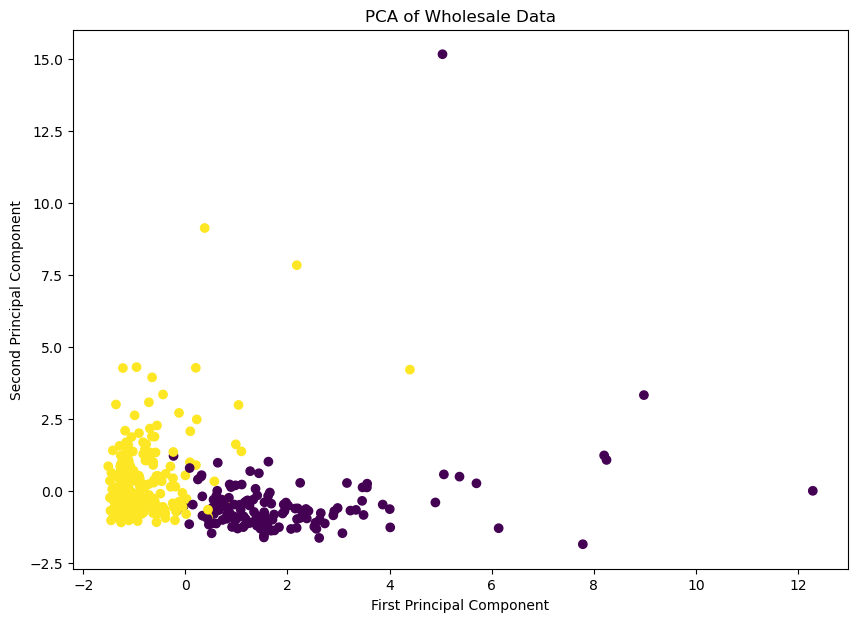

Explained variance ratio of the principal components: [0.38750123 0.22374588]


In [66]:
# applying PCA to reduce the dimensionality of the data to 2 dimensions
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 2 dimensions as we identified 2 clusters and this helps for visualization coincidentally
data_pca = pca.fit_transform(data_scaled)

# plot the first two principal components
plt.figure(figsize=(10, 7))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels_2, cmap='viridis') # cluster labels 2 from the agglomerative clustering
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Wholesale Data')
plt.show()

# Explained variance ratio of each principal component
print("Explained variance ratio of the principal components:", pca.explained_variance_ratio_)


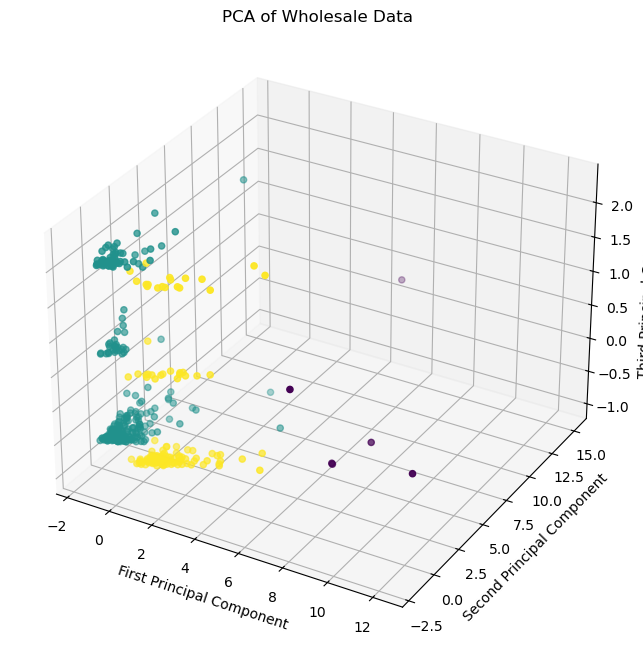

Explained variance ratio of the principal components: [0.38750123 0.22374588 0.12647173]


In [69]:
# applying PCA to reduce the dimensionality of the data to 3 dimensions
from sklearn.decomposition import PCA

pca = PCA(n_components=3) # 3 dimensions
data_pca = pca.fit_transform(data_scaled)

# plot three principal components
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=cluster_labels_3, cmap='viridis') # cluster labels 3 from the agglomerative clustering
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.title('PCA of Wholesale Data')
plt.show()

# Explained variance ratio of each principal component
print("Explained variance ratio of the principal components:", pca.explained_variance_ratio_)

### Thoughts
- PCA for 2 and 3 components shows the variation scores and the third is 0.126 - it is quite poor so it doesn't seem worth keeping. I am now convinced that 2 clusters is reasonable in a model that is not the strongest (PC1 is only 0.38 and 0.22 for PC2)
- The 3d graph is somewhat hard to visualize but it appears that there are two axes which show the points clustering in separate areas significantly but not really on the third. Building evidence that the third dimension is not necessary.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

### Final Concluding Thoughts

1. Thoughts on KMeans Clustering: The elbow rule was not conclusive for finding the ideal number of clusters when we provided a range to iterate through. from 3 - 5 the gradient of the line of inertia vs number of clusters was constant, which leaned towards 3 clusters by virtue of less overfitting risk. The elbow was larger for stopping at 2 clusters than 3 but not conclusive at that stage, so the KneeLocator was used which identified three clusters. Overall it was inconclusive at this stage.

2. Thoughts on Agglomerative Clustering: - When moving from 2 clusters to 3 clusters only 6 data points out of over 400 are even being assigned to this third data cluster for a 50% increase in number of clusters. This third cluster only adjusts for a very small subset of points so the extra complexity feels unnecessary. Concluding from this section that 2 clusters is appropriate

3. Thoughts on PCA: - **PC1 and PC2 together account for 61% of the variance.** This is not fantastic but it's fairly good, as long we we understand that we aren't capturing all of the variance. The problem is that introducing a third PC only gave us an incremental 12.6% explanation of variance, which in a vacuum is not bad but when looking at the results of the clustering, the evidence there leans towards 2 clusters with only a small benefit accrued for having a third. This makes me think that any third principal component may be finding variation from outliers in the dataset.


4. Holistic Conclusion: We have tested three methods: KMeans Clustering, Hierarchical Clustering and PCA, for finding patterns and profiles in the dataset. I understand that clustering is about proximity, and it appears that two clusters is optimal with only marginal benefit being gained from a third cluster for barely 1% of the dataset (6 of ~430 points). I understand that PCA is about variation, and two Principal Components can explain 61% of variation in the data and a further third component adds 12.6% explanation. In combining these, the moderate PC3 value of 12.6% is likely to be seeing variation due to outliers in the data, of which there are quite a few, and the variation is not due to a significantly different data point profile. I am comfortable concluding that there are two types of data observation being made from the dataset that we have and the analysis done so far.